# Pre Steps

In [23]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime, date, time


import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")


In [24]:
Project_B_Dummied4=pd.read_csv('project_B2_dummied.csv')

In [25]:
# Droping Na's that have sneaked in 
Project_B_Dummied4.dropna(inplace=True)

In [26]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)

In [27]:
Project_B_Dummied4.shape

(1827, 115)

# Step 1 Separate the target 

In [28]:
# Creating a new variable to go back to if need to reload
Xd=Project_B_Dummied4

# specify predictor matrix and target variable
y = Xd.pop('acc_ave_month_occ')
X = Xd

X.shape

(1827, 114)

# Step 2 Train, Test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [30]:
Insi_train=X_train.pop('Insi_ave_month_occ')
Insi_test=X_test.pop('Insi_ave_month_occ')

In [31]:
# standardize the data
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
# Insi=X_train.pop('Insi_ave_month_occ')
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# Step 3, Fitting the model

In [32]:
ridge = RidgeCV()
lasso = LassoCV()


model1 = ridge.fit(X_train,y_train)
model2 = lasso.fit(X_train,y_train)

params = {
    'fit_intercept':[True, False],
}

grid = GridSearchCV(LassoCV(),param_grid = params)

model3 = grid.fit(X_train,y_train)

# Step 4 Scoring the model 

In [33]:
model1.score(X_test,y_test)

0.4484311270635789

In [34]:
model2.score(X_test,y_test)

0.45964663910380665

In [35]:
# evaluate on the training set
print('Ridge Training score:', model1.score(X_train, y_train))
# evaluate on the test set
print("Ridge Test Score:", model1.score(X_test, y_test))

Ridge Training score: 0.544477471601643
Ridge Test Score: 0.4484311270635789


In [36]:
# evaluate on the training set
print('Lasso Training score:', model2.score(X_train, y_train))
# evaluate on the test set
print("Lasso Test Score:", model2.score(X_test, y_test))

Lasso Training score: 0.5157076365164818
Lasso Test Score: 0.45964663910380665


In [37]:
predictions_train = model2.predict(X_train)

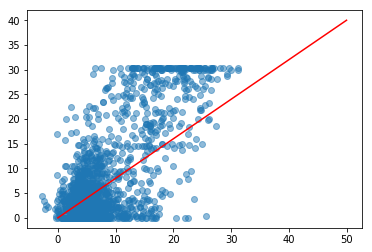

In [38]:
# Prediction graph 
plt.scatter(predictions_train,y_train,alpha=0.5)
plt.plot([0,50],[0,40],c='r')

# Results

R2 score of Ed's model level: 0.4617014495868018
R2 score of Inside AirBnB's Occupany level: -1.1526435658297483
50.35378585877252 201.36363559005042
Ed's model is 0.7499360512079444 then Inside AirBnB


0.040983606557377046

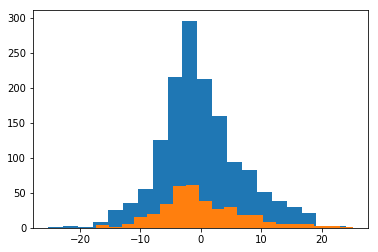

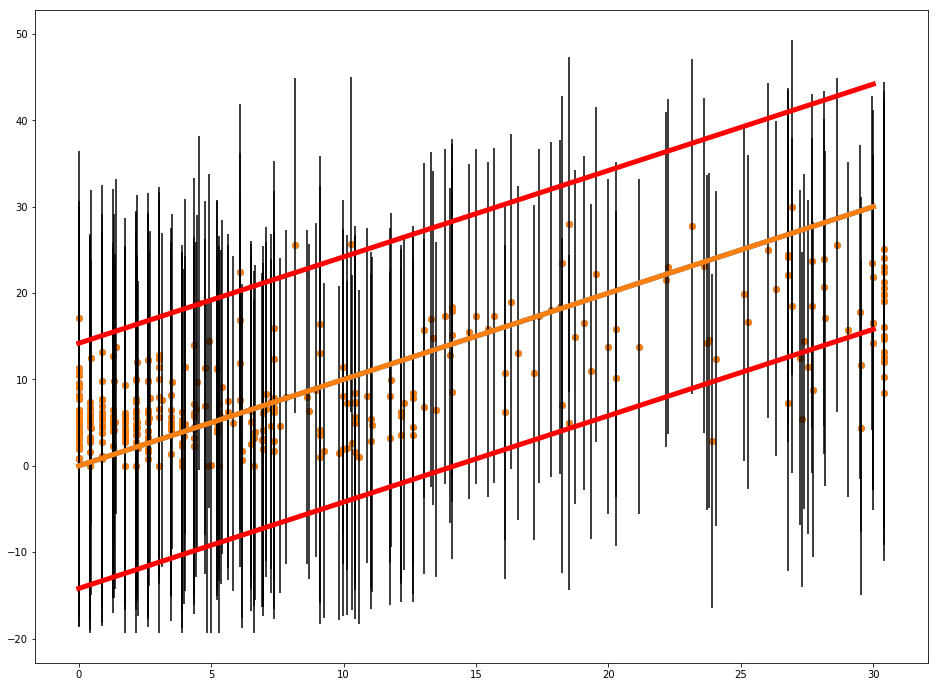

In [40]:
predictions_test=model2.predict(X_test)
predictions_test[predictions_test<0] = 0


ed = r2_score(y_test,predictions_test)
print("R2 score of Ed's model level:",ed)

ins = r2_score(y_test,Insi_test)
print("R2 score of Inside AirBnB's Occupany level:",ins)

ed = mean_squared_error(y_test,predictions_test)
ins = mean_squared_error(y_test,Insi_test)
# ave= mean_squared_error(y_test,average.iloc[:len(y_test)])
print(ed,ins)
# My model is this much better then Insi
print("Ed's model is", (1-ed/ins), "then Inside AirBnB")

plt.hist(y_train-model2.predict(X_train),bins=20);

plt.hist(y_test-predictions_test,bins=20);

plt.figure(figsize=(16,12))
plt.scatter(y_test,predictions_test)
#for i in range(len(y_test))#
#plt.vlines(y_test,predictions_test+2*ed**0.5,predictions_test-2*ed**0.5)
plt.plot([0,30],[0,30],lw=5)
plt.plot([0,30],[0+2*ed**0.5,30+2*ed**0.5],lw=5,c='r')
plt.plot([0,30],[0-2*ed**0.5,30-2*ed**0.5],lw=5,c='r');

plt.scatter(y_test,predictions_test)
#for i in range(len(y_test))
plt.vlines(y_test,predictions_test+2*y_test.var()**0.5,predictions_test-2*y_test.var()**0.5)
plt.plot([0,30],[0,30],lw=5);

(ed/ins)**0.5

ed**0.5

ins**0.5

y_test.shape

15/366